#Лабораторная работа №1

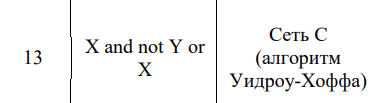

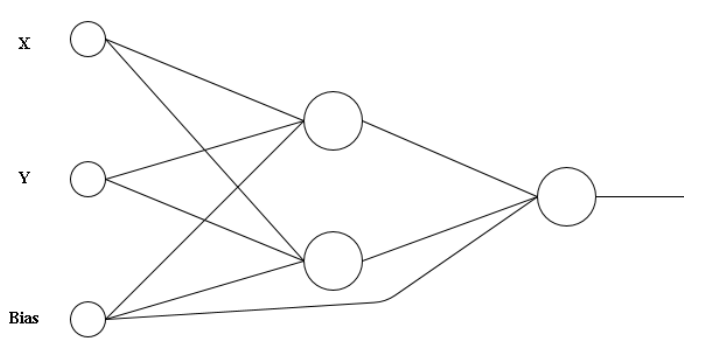

In [ ]:
import numpy as np
from random import random
import math

In [ ]:
bias = 1
a = 1
min_error = 0.1
count_of_epoch = 1000

In [ ]:
#Начальная функция
x_train = ([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

y_train = np.array([0, 0, 1, 1])

In [ ]:
#Сигмовидная функция активации
def activate(x):
  return 1 / (1 + math.pow(math.e, -x))

In [ ]:
#Производная от сигмоидной фукции
def dy_activate(x):
  return activate(x) * (1 - activate(x))

In [ ]:
#Генерация рандомных значений весом
weight = [
    [
      [random() , random() , random()],
      [random() , random() , random()],
    ],
    [
      [random() , random() , random()]
    ]
]

In [ ]:
#Функция, которая находит значение y по весам
def predict(weights, signals):
  signals_layers = []

  for i in range(len(weights[0])):
    print(weights[0][i], print(signals))
    print(np.dot(weights[0][i], signals))
    signals_layers.append(activate(np.dot(weights[0][i], signals)))

  signals_layers.append(1)

  s = np.dot(weights[1][0], signals_layers)

  return (activate(s), signals_layers, s)

In [ ]:
#Функция обучения сети по весам
def fit(weights, x_train, y_train, min_error, epochs, train_speed):
  for epoch in range(epochs):

    errs = 0

    print("Эпоха №{0}".format(epoch + 1))

    for i in range(len(x_train)):
      
      pr = predict(weights, x_train[i])
      y_pr = pr[0]
      signals_hidden = pr[1]
      net_k = pr[2]

      err = y_train[i] - y_pr
      errs += err ** 2

      sigma_o = train_speed * err * dy_activate(net_k)

      for j in range(len(weights[1][0])):
        weights[1][0][j] += sigma_o * signals_hidden[j]

      for j in range(len(weights[0])):

        net_j = np.dot(weights[0][j], x_train[i])
        der = train_speed * dy_activate(net_j)

        for k in range(len(weights[0][j])):
          weights[0][j][k] += der * x_train[i][k] * sigma_o * weights[1][0][j]

    errs = (errs / len(x_train)) ** 0.5
    print("Квадратичная ошибка = {0}, веса = {1}".format(errs , weights))

    if (errs <= min_error):
      print("Меньше заданной ошибки")
      break

  return weights

In [ ]:
fit(weight, x_train, y_train, min_error, count_of_epoch, a)

Эпоха №1
[0, 0, 1]
[0.810036291335615, 0.839608693832015, 0.6475890319063782] None
0.6475890319063782
[0, 0, 1]
[0.8324507090049239, 0.4815823685925993, 0.3457241191481958] None
0.3457241191481958
[1, 0, 1]
[0.810036291335615, 0.839608693832015, 0.6264901596081023] None
1.4365264509437172
[1, 0, 1]
[0.8324507090049239, 0.4815823685925993, 0.3334410149906999] None
1.1658917239956237
[0, 1, 1]
[0.7971388819962972, 0.839608693832015, 0.6135927502687845] None
1.4532014441007994
[0, 1, 1]
[0.8250456528533299, 0.4815823685925993, 0.32603595883910585] None
0.8076183274317051
[1, 1, 1]
[0.7971388819962972, 0.8433151276695565, 0.617299184106326] None
2.2577531937721798
[1, 1, 1]
[0.8250456528533299, 0.4841758025008123, 0.3286293927473189] None
1.637850848101461
Квадратичная ошибка = 0.609108138516215, веса = [[[0.7987383317271086, 0.8449145774003679, 0.6188986338371374], [0.8263559288701436, 0.48548607851762604, 0.3299396687641326]], [[0.7887174341846508, 0.40643650956013044, 0.6001914212625747

[[[-0.26464659896315573, 4.5252628557111665, -2.04681019252746],
  [0.8830178425295294, 0.8946229460536963, 0.2517316080631183]],
 [[5.47085600931822, 0.10898002742444439, -2.7484577162910466]]]

In [ ]:
#Функция получение значения mse
def mse(weights, x_test, y_test, predict, act):
  y_predict = []
  for x in x_test:
    y_predict.append(predict(weights, x)[0])
  return np.square(y_predict - y_test).mean()

In [ ]:
mse_delta = mse(weight, x_train, y_train, predict, activate)
print("MSE: {0}".format(mse_delta))

[0, 0, 1]
[-0.26464659896315573, 4.5252628557111665, -2.04681019252746] None
-2.04681019252746
[0, 0, 1]
[0.8830178425295294, 0.8946229460536963, 0.2517316080631183] None
0.2517316080631183
[1, 0, 1]
[-0.26464659896315573, 4.5252628557111665, -2.04681019252746] None
-2.311456791490616
[1, 0, 1]
[0.8830178425295294, 0.8946229460536963, 0.2517316080631183] None
1.1347494505926476
[0, 1, 1]
[-0.26464659896315573, 4.5252628557111665, -2.04681019252746] None
2.4784526631837065
[0, 1, 1]
[0.8830178425295294, 0.8946229460536963, 0.2517316080631183] None
1.1463545541168145
[1, 1, 1]
[-0.26464659896315573, 4.5252628557111665, -2.04681019252746] None
2.213806064220551
[1, 1, 1]
[0.8830178425295294, 0.8946229460536963, 0.2517316080631183] None
2.029372396646344
MSE: 0.009741680363004011
